#Purchase Analysis and Some useful Insights.

Even though sales data was not available I tried to get as much information from purchase data as possible. Since the purchases are done on weekly basis is gives an idea about the sales.



This project aims at finding some important information and insight in my father's buisiness like -


1.   Which are our best products?
2.   Which are the least performing products?

1.   Which are the best month for the business?
2.   What is the price distribution of products?

1.   What are the numbers wrt Makers?








##IMPORTS AND SETUP

Import Data Analysis Library

In [ ]:
import numpy as np
import pandas as pd

Import Data Visulisation Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Getting the Data

Read in the csv file as a dataframe called df

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/tripathima.csv')

Check the head of the dataframe

In [ ]:
df.head()

,Item Description,Bill No.,Date,Packing,Batch No.,Qty,Rate,Amount,Maker
0,ACAROT CAPS. (10X1X10),AP1469,2021-08-20,10X1X10C Box,AK6805,10.0,115.0,1150.0,ACME
1,ACAROT CAPS. (10X1X10),AP2122,2021-10-19,10X1X10C Box,AK7925,10.0,115.0,1150.0,ACME
2,ACAROT SYP 200 ML,AP1469,2021-08-20,1X200 BOT,GA490,360.0,28.0,10080.0,ACME
3,ACAROT SYP 200 ML,AP3523,2022-03-14,1X200 BOT,GA847,180.0,28.0,5040.0,ACME
4,ACEFO DRY SYRUP,AP0425,2021-05-10,1X30 ML,GDB200110,300.0,21.6,6480.0,ACME


In [ ]:
df['Item Description'] = df['Item Description'].str.replace('\n', '')

Check the info() of df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item Description  344 non-null    object        
 1   Bill No.          344 non-null    object        
 2   Date              344 non-null    datetime64[ns]
 3   Packing           344 non-null    object        
 4   Batch No.         344 non-null    object        
 5   Qty               344 non-null    float64       
 6   Rate              344 non-null    float64       
 7   Amount            344 non-null    float64       
 8   Maker             344 non-null    object        
 9   Month             344 non-null    object        
 10  Year              344 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 32.8+ KB


##Some Basic Insights

Which is the most purchased product? (Quantity Wise)

In [ ]:
products = df.groupby(['Item Description','Maker']).sum().sort_values('Qty' , ascending = False)
products.head(10)

<ipython-input-24-c35a17333cb0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products = df.groupby(['Item Description','Maker']).sum().sort_values('Qty' , ascending = False)


,,Qty,Rate,Amount,Year
Item Description,Maker,,,,
BROPECT EXPECTORANT,Aquila,3780.0,89.0,55620.0,12131.0
M-COLA INJECTION,Aquila,2890.0,30.7,18524.0,10108.0
ACAROT SYP 200 ML,ACME,2340.0,168.0,65520.0,12132.0
AQRAB-D CAPSULE,Aquila,1955.0,1380.0,269790.0,20216.0
ACEFO DRY SYRUP,ACME,1800.0,194.4,38880.0,18196.0
AQZYME SYRUP,Aquila,1728.0,150.0,43200.0,12131.0
AQDOM-O CAPSULE,Aquila,1724.0,954.0,135020.0,24262.0
AGESTRON - 500 INJ,Genesis,1470.0,405.0,66150.0,18195.0
TRISUL 1.5 GM INJECTION,Aquila,1250.0,180.0,37500.0,12131.0


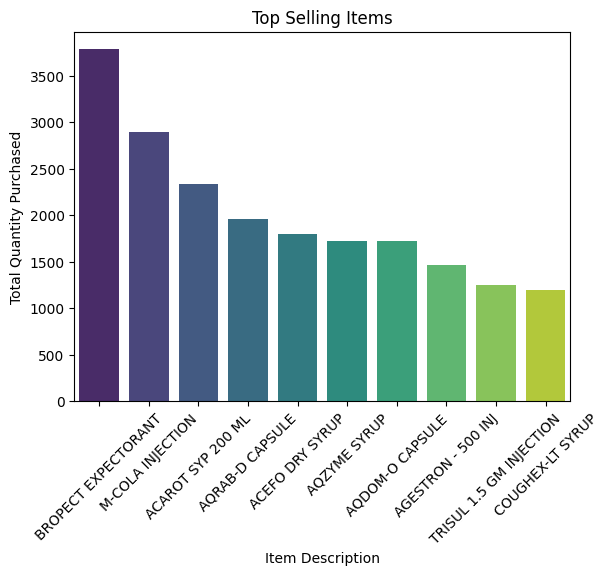

In [ ]:
# Calculate the total quantity sold for each item
top_items = df.groupby('Item Description')['Qty'].sum().nlargest(10)

# Plot top-selling items
sns.barplot(x=top_items.index, y=top_items.values,palette='viridis')
plt.xlabel('Item Description')
plt.ylabel('Total Quantity Purchased')
plt.title('Top Selling Items')
plt.xticks(rotation=45)
plt.show()

Which is the most purchased product? (Amount Wise)

In [ ]:
products = df.groupby(['Item Description','Maker']).sum().sort_values('Amount' , ascending = False)
products.head(10)

<ipython-input-13-39cdd4c9543e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  products = df.groupby(['Item Description','Maker']).sum().sort_values('Amount' , ascending = False)


,,Qty,Rate,Amount
Item Description,Maker,,,
AQRAB-D CAPSULE,Aquila,1955.0,1380.0,269790.0
FIXVIL-AZ-LB TABLET,Aquila,296.0,1650.0,244200.0
FIXVIL-O-LB TABLET,Aquila,410.0,2150.0,176300.0
MCOLA PLUS CAPSULES,Aquila,600.0,2660.0,168500.0
TYNIMOX CV 625 TABLET (10X6),Aquila,417.0,3420.0,157320.0
AQCEF-200 DT TABLET,Aquila,430.0,3730.0,145100.0
AQCEF-O TABLET,Aquila,318.0,1730.0,137330.0
AQDOM-O CAPSULE,Aquila,1724.0,954.0,135020.0
AQLOX-200 TABLET,Aquila,825.0,1210.0,90750.0


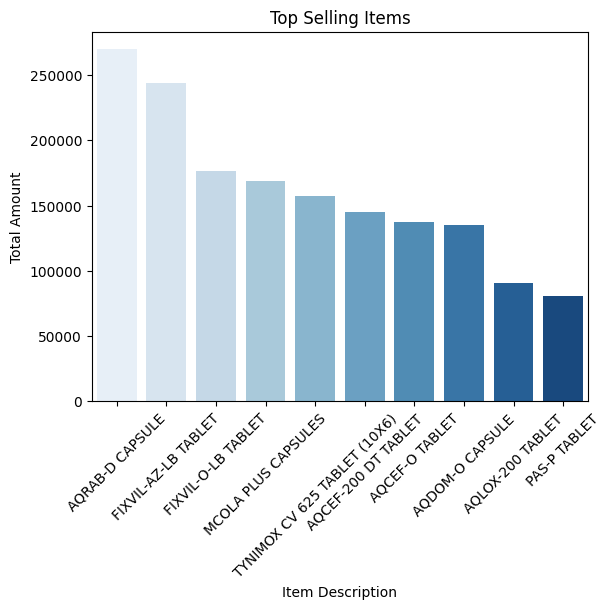

In [ ]:
# Calculate the total quantity sold for each item
top_items = df.groupby('Item Description')['Amount'].sum().nlargest(10)

# Plot top-selling items
sns.barplot(x=top_items.index, y=top_items.values,palette='Blues')
plt.xlabel('Item Description')
plt.ylabel('Total Amount')
plt.title('Top Selling Items')
plt.xticks(rotation=45)
plt.show()



1.   We could see that Injections and Syrups are the most purchased products; Quantity wise.
2.   And Capsules and Tablets corresponds to highest amount.
  
2.   **AQRAB-D CAPSULE, FIXVIL-AZ-LB TABLET, FIXVIL-O-LB TABLET, MCOLA PLUS CAPSULES, TYNIMOX CV 625 TABLET** are the **Top 5** product; Money wise.


4.   **BROPECT EXPECTORANT, M-COLA INJECTION, AQRAB-D CAPSULE, ACEFO DRY SYRUP, ACAROT SYP 200 ML** are the **Top 5** product; Quantity wise.


5.   Overall **AQRAB-D CAPSULE** is the best product as it is in top 5 in both.








In [ ]:
products.tail(10)

,,Qty,Rate,Amount
Item Description,Maker,,,
MAGNAFFIN PLUS SYP,ACME,72.0,26.0,1872.0
NERVIMIN-NT TABLET,ACME,10.0,160.0,1600.0
ACMEORS,ACME,120.0,12.0,1440.0
ACFEXO-M TABLET,ACME,5.0,268.0,1340.0
C-MUNO + TABLET **,ACME,20.0,65.0,1300.0
RHINONEED FORTE TAB,ACME,10.0,100.0,1000.0
ACMESIS TABS.,ACME,10.0,90.0,900.0
SECAL-DM TABS.(10*15T),Aquila,5.0,130.0,650.0
AFLACORT-6 TABS (10X10),ACME,4.0,145.0,580.0


**These are the least performing Products.**

Name of each product Purchased

In [ ]:
products.reset_index()['Item Description'].unique()

array(['AQRAB-D CAPSULE', 'FIXVIL-AZ-LB TABLET', 'FIXVIL-O-LB TABLET',
       'MCOLA PLUS CAPSULES', 'TYNIMOX CV 625 TABLET (10X6)',
       'AQCEF-200 DT TABLET', 'AQCEF-O TABLET', 'AQDOM-O CAPSULE',
       'AQLOX-200 TABLET', 'PAS-P TABLET', 'TYNIMOX 500 CAPS',
       'TURBO TABLET', 'AQRAB-D CAPSULE (L)', 'AGESTRON - 500 INJ',
       'BROPECT EXPECTORANT', 'AQUIGESIC TABLET', '\nACAROT SYP 200 ML',
       'AQPAR-P TABLET', 'CALBIN K2 TAB', 'AQRAB L CAP (10*10)',
       '\nTRAMPOL TAB', 'AQZYME SYRUP', 'COUGHEX-LT SYRUP',
       'ACEFO DRY SYRUP', 'AQPAR-S TABLET', 'TRISUL 1.5 GM INJECTION',
       'TYNIMOX DS KID TABLET', 'AQDOXIM-200 DT TABLET',
       'AQLOX OZ TABLET', 'FEB-Z-XT SYRUP', 'MAMTAFER SYRUP **',
       'ACPRO POWDER **', 'M-COLA INJECTION',
       'CALCIQ-Z SOFT GELATIN CAPS', 'CALCIATE-K2 TABLET',
       'AQTUM-500 TABLET', 'ACOPENE 12G SOFT GEL CAPSULE',
       'ACAROT SYP 200 ML', 'NERVIMIN - GN TAB', 'PAS TABLETS',
       'AQCET-M TABLET', 'COUGHEX-D SYRUP 100ML', 

Total Number of Products Purchased

In [ ]:
products.reset_index()['Item Description'].nunique()

85

Number of order wrt each Maker

In [ ]:
df['Maker'].value_counts()

Aquila     236
ACME        76
Genesis     26
SAPPL        6
Name: Maker, dtype: int64

Number of Products from Each Maker

In [ ]:
products.reset_index()['Maker'].value_counts()

Aquila     47
ACME       32
Genesis     5
SAPPL       1
Name: Maker, dtype: int64

**One very important Insight here is that Number of products from Aquila and ACME does not differ much but the amount differs vastly and 9 out of 10 least performing products are from ACME.**



Biggest Orders

In [ ]:
df['Bill No.'].value_counts().head(5)

AP2122      21
ACME1695    19
ACME3165    18
ACME0118    17
AP1469      15
Name: Bill No., dtype: int64

##Plots

<Axes: xlabel='Rate', ylabel='Count'>

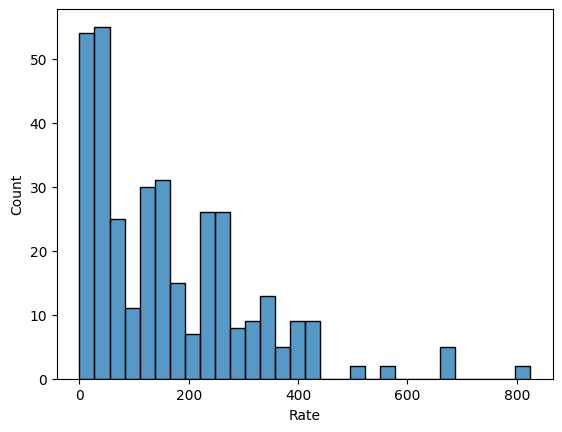

In [ ]:
sns.histplot(df['Rate'], bins =30)

We could see that most products have rates ranging from 0 to 500

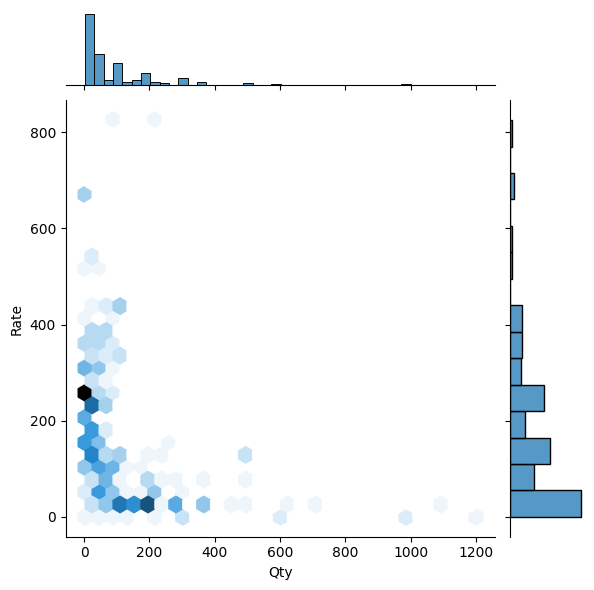

In [ ]:
sns.jointplot(x='Qty',y='Rate',data=df,kind='hex' )




**Low priced product are purchased in high Quantity and Product that are priced high are sold in low Quantity**

Using Seaborn to make countplot for each Maker

Text(0.5, 1.0, 'Total order from Makers')

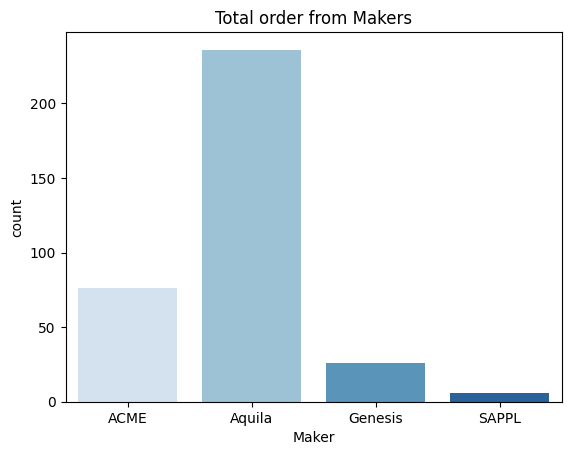

In [ ]:
sns.countplot(x='Maker',data=df,palette = 'Blues')
plt.title('Total order from Makers')


**We could see how Number of orders vary with each Maker**

Finding out Amount and Quantity Purchased per Maker

In [ ]:
makerplot = df.groupby('Maker').sum()
makerplot[['Amount' , 'Qty']]

<ipython-input-31-f4643466b5e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  makerplot = df.groupby('Maker').sum()


,Amount,Qty
Maker,,
ACME,422803.0,9828.0
Aquila,2387456.2,24546.0
Genesis,118000.0,1735.0
SAPPL,43500.0,500.0


###Using seaborn to plot a barplot between Maker vs Quantity and Maker vs Amount

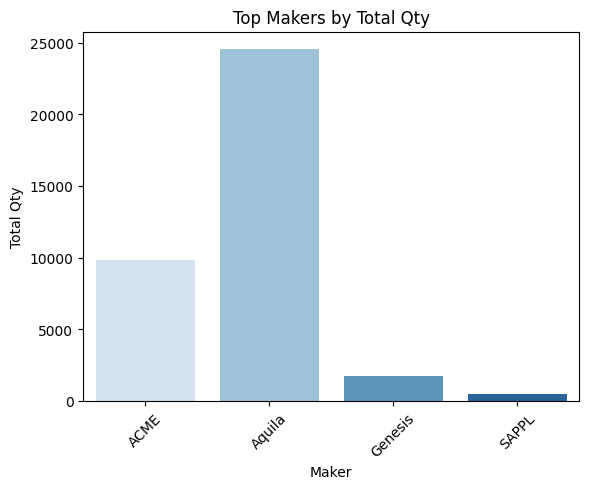

In [ ]:
sns.barplot(x='Maker',y='Qty',data=makerplot.reset_index(), palette='Blues')
plt.xlabel('Maker')
plt.ylabel('Total Qty')
plt.title('Top Makers by Total Qty')
plt.xticks(rotation=45)
plt.show()

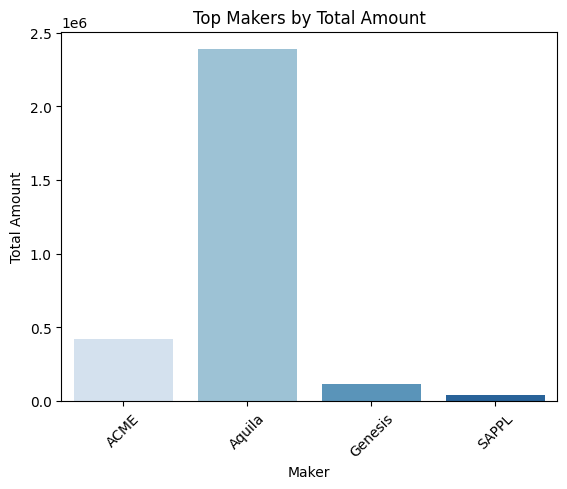

In [ ]:
sns.barplot(x='Maker',y='Amount',data=makerplot.reset_index(),palette='Blues')
plt.xlabel('Maker')
plt.ylabel('Total Amount')
plt.title('Top Makers by Total Amount')
plt.xticks(rotation=45)
plt.show()

**We could see that Aquila corresponds to most of the purchases Quantity wise as well as Amount wise**

##Date wise plots

The type of Date column is str

In [ ]:
type(df['Date'].iloc[0])

str

Changing its type to datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
time = df['Date'].iloc[0]
time.month

8

Splitting Months and Years into separate columns

In [ ]:
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Year'] = df['Date'].apply(lambda time: time.year)

In [ ]:
df.head()

,Item Description,Bill No.,Date,Packing,Batch No.,Qty,Rate,Amount,Maker,Month,Year
0,ACAROT CAPS. (10X1X10),AP1469,2021-08-20,10X1X10C Box,AK6805,10.0,115.0,1150.0,ACME,8.0,2021.0
1,ACAROT CAPS. (10X1X10),AP2122,2021-10-19,10X1X10C Box,AK7925,10.0,115.0,1150.0,ACME,10.0,2021.0
2,ACAROT SYP 200 ML,AP1469,2021-08-20,1X200 BOT,GA490,360.0,28.0,10080.0,ACME,8.0,2021.0
3,ACAROT SYP 200 ML,AP3523,2022-03-14,1X200 BOT,GA847,180.0,28.0,5040.0,ACME,3.0,2022.0
4,ACEFO DRY SYRUP,AP0425,2021-05-10,1X30 ML,GDB200110,300.0,21.6,6480.0,ACME,5.0,2021.0


###Plotting Month wise Purchase

<ipython-input-44-f7a582b55783>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly = df.groupby('Month').sum().sort_values('Amount' , ascending = False)


<Axes: xlabel='Month', ylabel='Amount'>

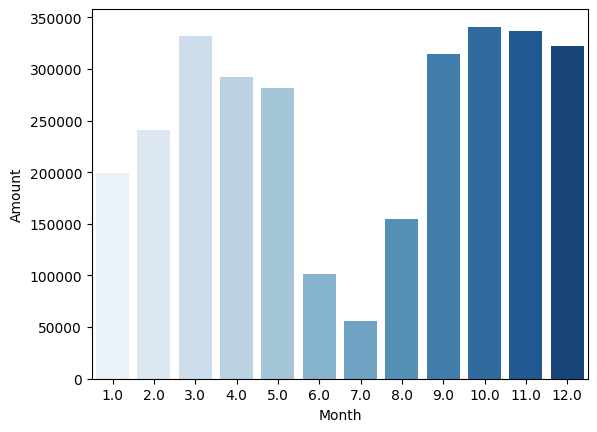

In [ ]:
 monthly = df.groupby('Month').sum().sort_values('Amount' , ascending = False)
 monthly.head(10)
 sns.barplot(x='Month',y ='Amount' ,data=monthly.reset_index() ,palette='Blues')

This Dataframe gives a breakdown of monthly sale per year

In [ ]:
dayMonth = df.groupby(by=['Month','Year']).sum()['Amount'].unstack()
dayMonth


<ipython-input-32-e8c1b3d5f81b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dayMonth = df.groupby(by=['Month','Year']).sum()['Amount'].unstack()


Year,2021.0,2022.0,2023.0
Month,,,
1.0,NaN,189450.0,9430.4
2.0,NaN,16575.0,224750.0
3.0,NaN,204200.0,127930.0
4.0,132860.0,159098.0,NaN
5.0,227730.0,53480.4,NaN
6.0,15125.6,86370.2,NaN
7.0,39950.0,16250.0,NaN
8.0,61414.0,92870.0,NaN
9.0,95925.6,218300.0,NaN


**We could see that June, july is usually off season and October, November are the best season.**

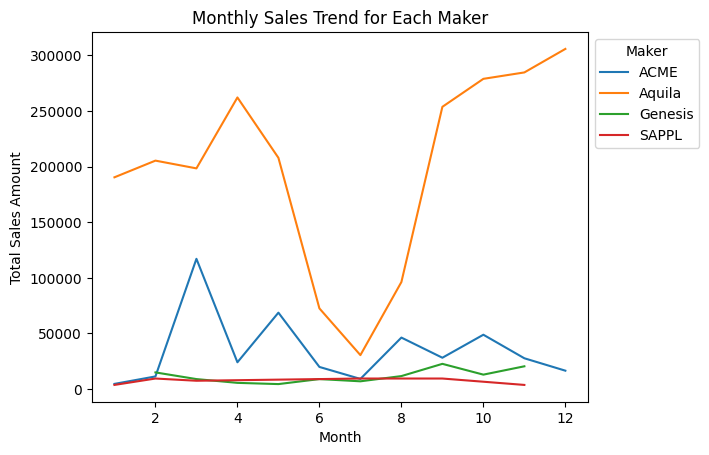

In [ ]:
# Group the data by 'Maker' and 'Month' and calculate the monthly sales
monthly_sales_by_maker = df.groupby(['Maker', 'Month'])['Amount'].sum().reset_index()

# Plot the monthly sales trend for each maker
sns.lineplot(x='Month', y='Amount', hue='Maker', data=monthly_sales_by_maker, estimator='sum')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trend for Each Maker')
plt.legend(title='Maker', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Thank you!

In [ ]:
product_sales_by_maker = df.groupby(['Maker', 'Item Description'])['Amount'].sum().reset_index()

# Sort the data within each 'Maker' group in descending order of sales amount
product_sales_by_maker = product_sales_by_maker.sort_values(by=['Maker', 'Amount'], ascending=[True, False])

# Create a dictionary to store the top 5 products for each maker
top_5_products_by_maker = {}

# Loop through each maker and select the top 5 products
for maker in product_sales_by_maker['Maker'].unique():
    top_products = product_sales_by_maker[product_sales_by_maker['Maker'] == maker].head(5)
    top_5_products_by_maker[maker] = top_products

# Display the top 5 products for each maker
for maker, top_products in top_5_products_by_maker.items():
    print(f"Top 5 products for {maker}:")
    print(top_products[['Item Description', 'Amount']])
    print("\n")







Top 5 products for ACME:
       Item Description   Amount
15  AQRAB-D CAPSULE (L)  68448.0
2     ACAROT SYP 200 ML  65520.0
20        CALBIN K2 TAB  46250.0
23     COUGHEX-LT SYRUP  40200.0
3       ACEFO DRY SYRUP  38880.0


Top 5 products for Aquila:
                Item Description    Amount
49               AQRAB-D CAPSULE  269790.0
62           FIXVIL-AZ-LB TABLET  244200.0
63            FIXVIL-O-LB TABLET  176300.0
67           MCOLA PLUS CAPSULES  168500.0
76  TYNIMOX CV 625 TABLET (10X6)  157320.0


Top 5 products for Genesis:
         Item Description   Amount
79     AGESTRON - 500 INJ  66150.0
81     CALCIATE-K2 TABLET  17500.0
80  CALCIATE PLUS CAPSULE  13500.0
82     NERVIMIN-DHA CAPS.  10850.0
78    ACMESIS PLUS TABLET  10000.0


Top 5 products for SAPPL:
   Item Description   Amount
83      TRAMPOL TAB  43500.0


